In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.rcParams['figure.facecolor'] = 'white'

In [2]:
from IPython.display import display
from scipy.stats import spearmanr, permutation_test, ttest_ind

In [3]:
wordlist = pd.read_csv("data/image_word.csv")
wordlist.tail(2)

,image,stimulus,url,food.item
136,Yogurt-pretzels.jpg,yogurt pretzels,https://voices.uchicago.edu/bakkourlab/files/2...,yogurt pretzels
137,Yogurt-with-granola-strawberries.jpg,yogurt no spoon,https://voices.uchicago.edu/bakkourlab/files/2...,yogurt with granola & strawberries


In [4]:
# datast constants
fixation = 0
target = 1
repeat = 2
filler = 3
vigilance = 4

hit = 11
miss = 12
false_alarm = 13
correct_rejection = 14

target_hit = 211
target_FA = 113
target_miss = 212
target_correct_rej = 114

In [5]:
def preprocess(expt, mem_data):

    im = wordlist["image"] if expt == 1 else wordlist["food.item"]
    total = np.zeros((len(mem_data), len(wordlist),  4)) # istarget, Hit, False alarm, correct rejection
    
    for participant in range(len(mem_data)):

        image_seq = mem_data.iloc[participant]["Answer.imseq"].split(",")
        image_seq = [ image_seq[i] for i in range(0, len(image_seq), 2)]

        values_seq = [ int(i) for i in mem_data.iloc[participant]["Answer.imtypeseq"].split(",")]
        perf_seq = [int(i) for i in mem_data.iloc[participant]["Answer.perfseq"].split(",")]

        for i in range(0, len(perf_seq), 2):
            if perf_seq[i + 1] == 0:
                perf_seq[i] = values_seq[i] * 100 + perf_seq[i]
            else:
                perf_seq[i] = values_seq[i] * 100 + perf_seq[i + 1]

        values_seq = [ values_seq[i] for i in range(0, len(values_seq), 2)]
        perf_seq = [ perf_seq[i] for i in range(0, len(perf_seq), 2)]

        for i in range(len(image_seq)):
            if values_seq[i] not in [target, repeat]:
                continue

            index = im[im == image_seq[i]].index[0]

            if values_seq[i] == target:
                total[participant, index, 0] = 1

            if perf_seq[i] == target_hit:
                total[participant, index, 1] += 1
            elif perf_seq[i] == target_FA:
                total[participant, index, 2] += 1
            elif perf_seq[i] == target_correct_rej:
                total[participant, index, 3] += 1
            
    
    # mem_count["HR"] = mem_count["Hit"] / mem_count["Target Count"]
    # mem_count["FAR"] = mem_count["False Alarm"] /( mem_count["False Alarm"]+mem_count["Correct Rejection"])
    # mem_count["CR"] = mem_count["HR"] - mem_count["FAR"]
    return total

# Expt 1A

In [6]:
mem_data_1a = pd.read_csv("data/Exp1A.csv")
mem_data_1a.head(2)

,Unnamed: 0,Title,CreationTime,WorkTimeInSeconds,Answer.Submit.HIT,Answer.age,Answer.comment,Answer.education,Answer.ending,Answer.ethnicity,Answer.gender,Answer.imseq,Answer.imtypeseq,Answer.perfseq,Answer.quiz_1,Answer.quiz_2,Answer.quiz_3
0,1,Memory test for food images,Wed Nov 18 19:26:58 PST 2020,1046,Submit HIT,26-30,{},Bachelor,completed,Caucasian,Male,"Soy-crisps.jpg,fixation.jpg,Chocolate-trail-mi...","3,0,3,0,1,0,3,0,3,0,1,0,3,0,3,0,4,0,3,0,3,0,3,...","14,0,14,0,14,0,14,0,14,0,14,0,14,0,14,0,11,0,1...",Correct,Correct,Correct
1,2,Memory test for food images,Wed Nov 18 19:26:58 PST 2020,1011,Submit HIT,26-30,good,Bachelor,completed,Caucasian,Male,"Melba-Toast-rye-Old-London.jpg,fixation.jpg,MM...","3,0,3,0,1,0,3,0,3,0,3,0,1,0,4,0,3,0,3,0,3,0,4,...","14,0,14,0,14,0,14,0,14,0,14,0,14,0,12,0,14,0,1...",Correct,Correct,Correct


In [7]:
mem_pre_1a = preprocess(1, mem_data_1a)

In [8]:
per_image_1a = mem_pre_1a.sum(axis=0)
# per_image_1a

In [9]:
HR_1a = per_image_1a[:, 1] / per_image_1a[:, 0]
FAR_1a = per_image_1a[:, 2] / (per_image_1a[:, 2] + per_image_1a[:, 3])
CR_1a = HR_1a - FAR_1a

In [10]:
pd.Series(CR_1a).describe()

count    138.000000
mean       0.471021
std        0.128011
min       -0.025000
25%        0.382305
50%        0.475000
75%        0.550000
max        0.860465
dtype: float64

In [13]:
wordlist.iloc[CR_1a.argmin()]

image                                     Saltine-crackers.jpg
stimulus                                              saltines
url          https://voices.uchicago.edu/bakkourlab/files/2...
food.item                                     saltine crackers
Name: 109, dtype: object

In [14]:
wordlist.iloc[CR_1a.argmax()]

image                                     Pizza-restaurant.jpg
stimulus                                                 pizza
url          https://voices.uchicago.edu/bakkourlab/files/2...
food.item                                                pizza
Name: 89, dtype: object

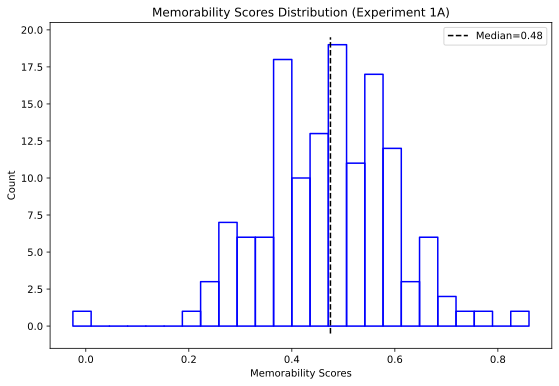

In [22]:
plt.figure(figsize=(9,6))
sns.histplot(CR_1a, color="blue", fill=False, bins=25)
m_1a = np.median(CR_1a)
plt.vlines(m_1a, -0.5, 19.5, colors='black', linestyles='dashed', label=f'Median={m_1a.round(2)}')
plt.title("Memorability Scores Distribution (Experiment 1A)")
plt.xlabel("Memorability Scores")
plt.legend()
plt.show()

# Expt 2B

In [15]:
mem_data_2b = pd.read_csv("data/Exp2B.csv")
mem_data_2b.head(2)

,Unnamed: 0,Title,Keywords,CreationTime,WorkTimeInSeconds,Answer.Submit.HIT,Answer.age,Answer.comment,Answer.education,Answer.ending,Answer.ethnicity,Answer.gender,Answer.imseq,Answer.imtypeseq,Answer.perfseq,Answer.quiz_1,Answer.quiz_2,Answer.quiz_3
0,1,Memory test for word(s),"Memory, words, food, cognitive test",Mon Jun 07 13:36:18 PDT 2021,1614,Submit HIT,27,{},Bachelor,completed,Native American,Male,"mini muffins,+,corn on the cob,+,grapefruit,+,...","1,0,3,0,3,0,3,0,3,0,3,0,4,0,3,0,3,0,1,0,3,0,4,...","14,0,14,0,14,0,14,0,14,0,14,0,11,0,14,0,14,0,1...",Correct,Correct,Correct
1,3,Memory test for word(s),"Memory, words, food, cognitive test",Mon Jun 07 13:36:18 PDT 2021,789,Submit HIT,30,NaN,Bachelor,completed,Caucasian,Female,"cocktail shrimp,+,rice and beans,+,cheez-its,+...","3,0,1,0,3,0,3,0,3,0,4,0,3,0,3,0,1,0,3,0,3,0,4,...","14,0,14,0,14,0,14,0,14,0,12,0,14,0,14,0,14,0,1...",Correct,Correct,Correct


In [16]:
mem_pre_2b = preprocess(2, mem_data_2b)

In [17]:
per_image_2b = mem_pre_2b.sum(axis=0)

In [18]:
HR_2b = per_image_2b[:, 1] / per_image_2b[:, 0]
FAR_2b = per_image_2b[:, 2] / (per_image_2b[:, 2] + per_image_2b[:, 3])
CR_2b = HR_2b - FAR_2b

In [19]:
pd.Series(CR_2b).describe()

count    138.000000
mean       0.261401
std        0.123317
min       -0.025000
25%        0.179487
50%        0.253205
75%        0.341806
max        0.585366
dtype: float64

In [20]:
wordlist.iloc[CR_2b.argmin()]

image                                             Skittles.jpg
stimulus                                              skittles
url          https://voices.uchicago.edu/bakkourlab/files/2...
food.item                                             skittles
Name: 113, dtype: object

In [21]:
wordlist.iloc[CR_2b.argmax()]

image                                              Kit-Kat.jpg
stimulus                                                kitkat
url          https://voices.uchicago.edu/bakkourlab/files/2...
food.item                                              kit kat
Name: 64, dtype: object

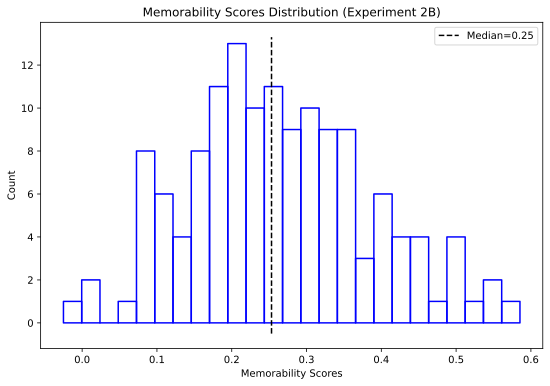

In [23]:
m_2b = np.median(CR_2b)
plt.figure(figsize=(9,6))
sns.histplot(CR_2b, color="blue", fill=False, bins=25)
plt.vlines(m_2b, -0.5, 13.3, colors='black', linestyles='dashed', label=f"Median={m_2b.round(2)}")
plt.title("Memorability Scores Distribution (Experiment 2B)")
plt.xlabel("Memorability Scores")
plt.legend()
plt.show()

---


In [24]:
def half_split(data):
    
    group1 = np.zeros((1000, 138))
    group2 = np.zeros((1000, 138))
    corr = np.zeros(1000)
    
    for i in range(1000):
        
        # if i != 0:
        np.random.shuffle(data)
        g1, g2 = np.array_split(data, 2)
        
        per_image_g1 = g1.sum(axis=0)
        per_image_g2 = g2.sum(axis=0)
        
        HR_g1 =  per_image_g1[:, 1] / per_image_g1[:, 0]
        FAR_g1 = per_image_g1[:, 2] / (per_image_g1[:, 2] + per_image_g1[:, 3])
        
        HR_g2 =  per_image_g2[:, 1] / per_image_g2[:, 0]
        FAR_g2 = per_image_g2[:, 2] / (per_image_g2[:, 2] + per_image_g2[:, 3])
        
        CR_g1 = HR_g1 - FAR_g1
        CR_g2 = HR_g2 - FAR_g2
        
        # if i != 0:       
        group1[i] = CR_g1
        group2[i] = CR_g2

        corr[i] = spearmanr(CR_g1, CR_g2).statistic
        
    return group1, group2, corr

In [25]:
def consistency(expt):
    if expt == 1:
        data = mem_pre_1a
    else:
        data = mem_pre_2b
    
    group1, group2, corr = half_split(data)
    
    print(pd.DataFrame(corr).describe())
    
    coor = np.zeros(1000)
    
    mean_g1 = group1.mean(axis=0)
    mean_g2 = group2.mean(axis=0)
    
    random = np.zeros((1000, 138))
    for i in range(1000):
        random[i] = group1[i, np.random.permutation(138)]
        coor[i] = spearmanr(random[i], group2[i]).statistic
    
    mean_rand = random.mean(axis=0)
    
    order = np.argsort(mean_g1)
    
    return mean_g1, mean_g2, mean_rand, order, group1, group2, corr, coor

In [40]:
mean1_1a, mean2_1a, mean_rand_1a, order_1a, group1_1a, group2_1a, corr_1a, coor_1a = consistency(1)

                 0
count  1000.000000
mean      0.291022
std       0.056248
min       0.091364
25%       0.253936
50%       0.291926
75%       0.328389
max       0.490020


In [44]:
df_1a = pd.DataFrame({
    "rank": np.arange(1, 139),
    "mean1": mean1_1a[order_1a][::-1],
    "mean2": mean2_1a[order_1a][::-1],
    "random": mean_rand_1a
})

Text(0.5, 1.0, 'Split-Half Reliability (Experiment 1A)')

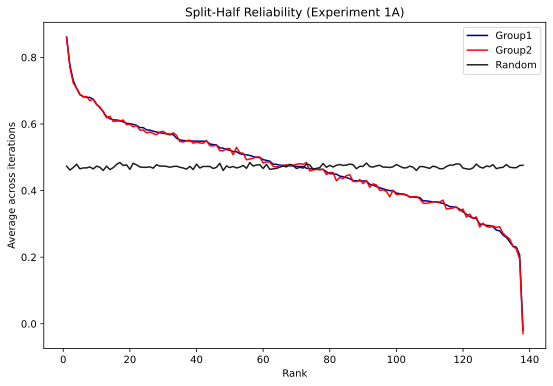

In [45]:
plt.figure(figsize=(9,6))
plt.plot(df_1a["rank"], df_1a["mean1"], color="darkblue", label="Group1")
plt.plot(df_1a["rank"], df_1a["mean2"], color="red", label="Group2")
plt.plot(df_1a["rank"], df_1a["random"], color="#1C1C1C", label="Random")
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Average across iterations")
plt.title("Split-Half Reliability (Experiment 1A)")

# Expt 2B

In [41]:
mean1_2b, mean2_2b, mean_rand_2b, order_2b, group1_2b, group2_2b, corr_2b, coor_2b = consistency(2)

                 0
count  1000.000000
mean      0.256406
std       0.055674
min       0.099681
25%       0.219180
50%       0.252993
75%       0.296276
max       0.478704


In [46]:
df_2b = pd.DataFrame({
    "rank": np.arange(1, 139),
    "mean1": mean1_2b[order_2b][::-1],
    "mean2": mean2_2b[order_2b][::-1],
    "random": mean_rand_2b
})

Text(0.5, 1.0, 'Split-Half Reliability (Experiment 2B)')

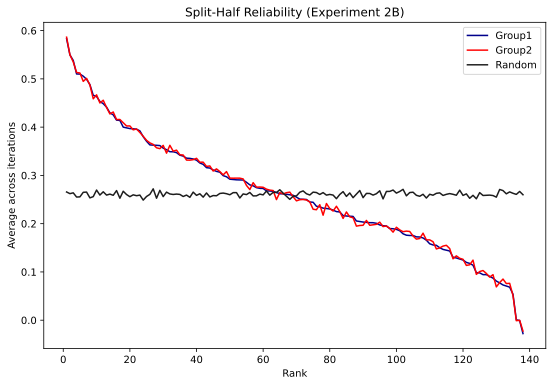

In [47]:
plt.figure(figsize=(9,6))
plt.plot(df_2b["rank"], df_2b["mean1"], color="darkblue", label="Group1")
plt.plot(df_2b["rank"], df_2b["mean2"], color="red", label="Group2")
plt.plot(df_2b["rank"], df_2b["random"], color="#1C1C1C", label="Random")
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Average across iterations")
plt.title(r"Split-Half Reliability (Experiment 2B)")

---

p-values

In [42]:
coor_1a[coor_1a > corr_1a.mean()].size / 1000

0.0

In [43]:
coor_2b[coor_2b > corr_2b.mean()].size / 1000

0.002